## Практическое задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras


from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization  

import os

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = False
num_predictions = 20
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

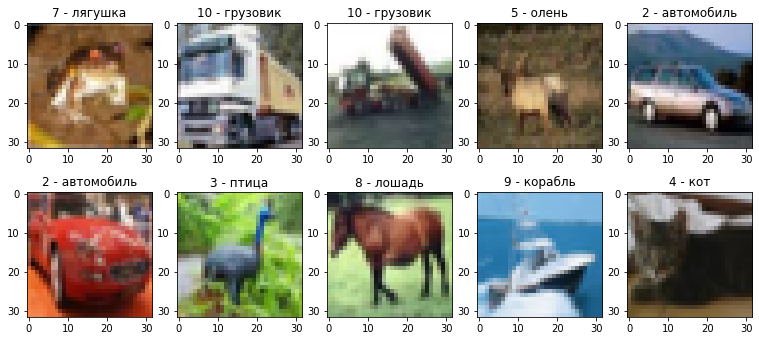

In [6]:
plt.figure(figsize = (13, 15))
for i in range(10):
    image = x_train[i,:,:]
    image = np.array(image)
    plt.subplot(5, 5, i+1)
    plt.title(str(np.argmax(y_train[i])+1) + ' - ' + classes[np.argmax(y_train[i])])
    plt.imshow(image)
plt.show() 

In [7]:
# конфигурирование слоев нейросети
model = Sequential([
                    
    Conv2D(filters=32,
        kernel_size=(11, 11),
        strides=(1, 1),
        input_shape=x_train.shape[1:],
        activation='relu',
        padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),
    
    Conv2D(filters=32,
        kernel_size=(8, 8),
        strides=(1, 1),
        input_shape=x_train.shape[1:],
        activation='relu'
      ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),  
    
    Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    Dropout( 0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        11648     
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          65568     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 32)         1

2022-06-03 14:17:40.972331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
w_old = model.layers[-1].get_weights()

In [9]:
summary_data = pd.DataFrame(columns=['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.8844 - accuracy: 0.2943 - val_loss: 1.6978 - val_accuracy: 0.3820
Epoch 2/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6321 - accuracy: 0.3927 - val_loss: 1.6863 - val_accuracy: 0.3849
Epoch 3/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.5149 - accuracy: 0.4461 - val_loss: 1.5052 - val_accuracy: 0.4628
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4330 - accuracy: 0.4792 - val_loss: 1.3959 - val_accuracy: 0.4974
Epoch 5/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3759 - accuracy: 0.5037 - val_loss: 1.6999 - val_accuracy: 0.4131
Epoch 6/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3266 - accuracy: 0.5223 - val_loss: 1.6688 - val_accuracy: 0.4285
Epoch 7/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.2910 - accuracy: 0.5368 - val_loss: 1.3994 

In [10]:
loss_metric_train = model.evaluate(x_train, y_train)
loss_metric_test = model.evaluate(x_test, y_test, verbose=1)


313/313 [==============================] - 4s 14ms/step - loss: 1.4453 - accuracy: 0.4816


In [11]:
summary_data.loc["Базовая модель", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 3,  32, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]

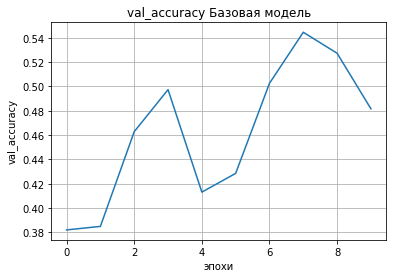

In [12]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy Базовая модель', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

Посчитаем для модели из трех слоев по 64 ядра

In [13]:
model_1 = Sequential([
                    
    Conv2D(filters=64,
        kernel_size=(11, 11),
        strides=(1, 1),
        input_shape=x_train.shape[1:],
        activation='relu',
        padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),

    Conv2D(filters=64,
        kernel_size=(8, 8),
        strides=(1, 1),
        input_shape=x_train.shape[1:],
        activation='relu'
      ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),
    
    Conv2D(filters=64, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    Dropout( 0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model_1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        23296     
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          262208    
                                                                 
 batch_normalization_4 (Batc  (None, 8, 8, 64)        

In [14]:
hist = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 143s 91ms/step - loss: 1.8702 - accuracy: 0.3108 - val_loss: 1.7665 - val_accuracy: 0.3732
Epoch 2/10
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5439 - accuracy: 0.4350 - val_loss: 1.4803 - val_accuracy: 0.4523
Epoch 3/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4056 - accuracy: 0.4906 - val_loss: 1.4975 - val_accuracy: 0.4537
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.3152 - accuracy: 0.5301 - val_loss: 1.8727 - val_accuracy: 0.3776
Epoch 5/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.2490 - accuracy: 0.5510 - val_loss: 1.3337 - val_accuracy: 0.5206
Epoch 6/10
1563/1563 [==============================] - 151s 97ms/step - loss: 1.1903 - accuracy: 0.5779 - val_loss: 1.3369 - val_accuracy: 0.5245
Epoch 7/10
1563/1563 [==============================] - 157s 100ms/step - loss: 1.1437 - accuracy: 0.5957 - val_loss:

In [15]:
loss_metric_train = model_1.evaluate(x_train, y_train)
loss_metric_test = model_1.evaluate(x_test, y_test, verbose=1)
summary_data.loc["Модель из 3 слоев по 64 ядра", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 3,  64, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]

313/313 [==============================] - 8s 25ms/step - loss: 0.9922 - accuracy: 0.6504


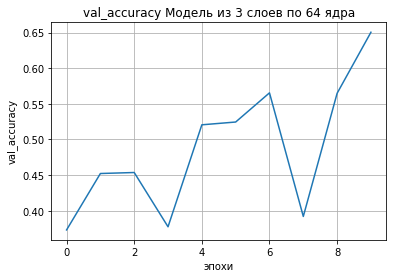

In [16]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy Модель из 3 слоев по 64 ядра', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

Посчитаем для модели из пяти слоев по 32 ядра

In [17]:
model_2 = Sequential([
                    
    Conv2D(filters=32,
        kernel_size=(11, 11),
        strides=(1, 1),
        input_shape=x_train.shape[1:],
        activation='relu',
        padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),

    Conv2D(filters=32,
        kernel_size=(8, 8),
        strides=(1, 1),
        input_shape=x_train.shape[1:],
        activation='relu'
      ),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Dropout( 0.25),
    
    Conv2D(filters=32, kernel_size=(5, 5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=32, kernel_size=(3, 3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),

    Conv2D(filters=64, kernel_size=(1, 1), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model_2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        11648     
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 32)          65568     
                                                                 
 batch_normalization_7 (Batc  (None, 8, 8, 32)        

In [18]:
hist = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 109s 70ms/step - loss: 1.9756 - accuracy: 0.2656 - val_loss: 1.7148 - val_accuracy: 0.3580
Epoch 2/10
1563/1563 [==============================] - 110s 70ms/step - loss: 1.6572 - accuracy: 0.3878 - val_loss: 1.4993 - val_accuracy: 0.4543
Epoch 3/10
1563/1563 [==============================] - 113s 72ms/step - loss: 1.5199 - accuracy: 0.4498 - val_loss: 1.5421 - val_accuracy: 0.4281
Epoch 4/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4327 - accuracy: 0.4863 - val_loss: 1.4366 - val_accuracy: 0.4891
Epoch 5/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.3697 - accuracy: 0.5101 - val_loss: 1.2904 - val_accuracy: 0.5392
Epoch 6/10
1563/1563 [==============================] - 122s 78ms/step - loss: 1.3161 - accuracy: 0.5326 - val_loss: 1.3080 - val_accuracy: 0.5196
Epoch 7/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.2794 - accuracy: 0.5499 - val_loss: 1

In [19]:
loss_metric_train = model_2.evaluate(x_train, y_train)
loss_metric_test = model_2.evaluate(x_test, y_test, verbose=1)
summary_data.loc["Модель из 5 слоев по 32 ядра", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 5,  32, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]

313/313 [==============================] - 5s 16ms/step - loss: 1.2861 - accuracy: 0.5455


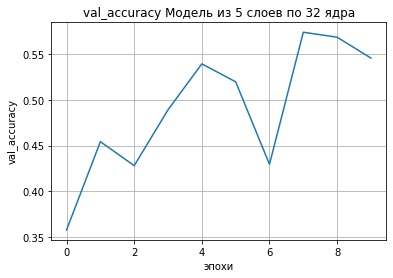

In [20]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy Модель из 5 слоев по 32 ядра', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

Посчитаем полносвязную модель

In [21]:
model_3 = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [22]:
hist = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9522 - accuracy: 0.2979 - val_loss: 1.7773 - val_accuracy: 0.3726
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7943 - accuracy: 0.3623 - val_loss: 1.7170 - val_accuracy: 0.4059
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7342 - accuracy: 0.3853 - val_loss: 1.6705 - val_accuracy: 0.4133
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6906 - accuracy: 0.4012 - val_loss: 1.6217 - val_accuracy: 0.4404
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6612 - accuracy: 0.4142 - val_loss: 1.6083 - val_accuracy: 0.4304
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6359 - accuracy: 0.4243 - val_loss: 1.5575 - val_accuracy: 0.4521
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6101 - accuracy: 0.4360 - val_loss: 1.5839 - val_accuracy:

In [23]:
oss_metric_train = model_3.evaluate(x_train, y_train)
loss_metric_test = model_2.evaluate(x_test, y_test, verbose=1)

summary_data.loc["Модель полносвязная", ['layers', 'neurons', 'loss', 'accuracy', 'val_loss', 'val_accuracy']] = [ 5,  32, loss_metric_train[0], loss_metric_train[1], loss_metric_test[0], loss_metric_test[1]]
summary_data

313/313 [==============================] - 4s 14ms/step - loss: 1.2861 - accuracy: 0.5455


,layers,neurons,loss,accuracy,val_loss,val_accuracy
Базовая модель,3,32,1.40535,0.49138,1.445262,0.4816
Модель из 3 слоев по 64 ядра,3,64,0.8981,0.67794,0.992219,0.6504
Модель из 5 слоев по 32 ядра,5,32,1.234098,0.56118,1.286062,0.5455
Модель полносвязная,5,32,1.234098,0.56118,1.286062,0.5455


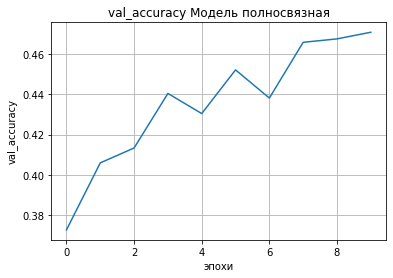

In [24]:
plt.plot(np.arange(epochs), hist.history['val_accuracy'])
plt.title('val_accuracy Модель полносвязная', fontsize=12)
plt.ylabel('val_accuracy')
plt.xlabel('эпохи')
plt.grid(True)
plt.show()

Обобщаем

In [25]:
summary_data

,layers,neurons,loss,accuracy,val_loss,val_accuracy
Базовая модель,3,32,1.40535,0.49138,1.445262,0.4816
Модель из 3 слоев по 64 ядра,3,64,0.8981,0.67794,0.992219,0.6504
Модель из 5 слоев по 32 ядра,5,32,1.234098,0.56118,1.286062,0.5455
Модель полносвязная,5,32,1.234098,0.56118,1.286062,0.5455


Для наших данных большее влияние на точность модели оказывает количество ядер (ширина слоев). 
Увеличение количества слоев и полносвязная модель дают точность хуже.